### K-Means算法的手动实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43)  # 设置随机种子
def L2(vecXi, vecXj):
    '''
    计算欧氏距离
    para vecXi：点坐标，向量
    para vecXj：点坐标，向量
    retrurn: 两点之间的欧氏距离
    '''
    return np.sqrt(np.sum(np.square(vecXi - vecXj)))



In [2]:
def update_center_point(S, sampleTag, k):
    """
    返回更新之后的点
    """
    center_points = []
    for i in range(k):
        cluster_point = []
        # 将所有属于同一簇的点放入数组
        for j in range(len(sampleTag)):
            if sampleTag[j] == i:
                cluster_point.append(S[j])
        
        cluster_point = np.array(cluster_point)
        center_point = np.sum(cluster_point,axis=0) * 1 / (len(cluster_point))
        center_points.append(center_point)
    return center_points

In [3]:
def isChange(center_points, pred_center_points, tol=1e-4):
    """
    判断中心点是否发生改变
    """
    
    for i in range(len(center_points)):
        if pred_center_points[i][0] != center_points[i][0]:
            return True
        elif pred_center_points[i][1] != center_points[i][1]:
            return True
    return False
    # return np.any(np.linalg.norm(np.array(center_points) - np.array(pred_center_points), axis=1) > tol)

In [4]:
def kMeans(S, k, distMeas=L2):
    '''
    K均值聚类
    para S：样本集，多维数组
    para k：簇个数
    para distMeas：距离度量函数，默认为欧氏距离计算函数
    return sampleTag：一维数组，存储样本对应的簇标签
    return clusterCents：一维数组，各簇中心
    retrun SSE:误差平方和
    '''
    is_change = True
    #  初始化：随机选取k各数据点作为中心
    random_index = np.random.choice(len(S), k, replace=False)
    center_points = [S[i] for i in random_index]
    
    while(is_change):
        pred_center_points = center_points
        #  对于每个数据点，计算到每个簇中心的距离
        SSE_all_point = np.array([])
        sampleTag = np.array([])
        for point in S:
            dis_i = np.array([])
            for i in range(k):
                center_point = center_points[i]
                distance = distMeas(point, center_point)
                dis_i = np.append(dis_i, distance)

            sampleTag = np.append(sampleTag,np.argmin(dis_i))
            SSE_all_point = np.append(SSE_all_point,np.min(dis_i)**2)
        
        # 计算每个簇的中心
        center_points = update_center_point(S,sampleTag, k)
        SSE = np.sum(SSE_all_point)
        
        # 判断中心点有无发生改变
        is_change = isChange(center_points, pred_center_points)
        print("is_change: ",is_change)
    return center_points, sampleTag, SSE
        
        
        
    

In [5]:
samples = np.array([
 [ 8.76474369, 14.97536963],
 [ 4.54577845, 7.39433243],
 [ 5.66184177, 10.45327224],
 [ 6.02005553, 18.60759073],
 [12.56729723, 5.50656992],
 [ 4.18694228, 14.02615036],
 [ 5.72670608, 8.37561397],
 [ 4.09989928, 14.44273323],
 [ 2.25717893, 1.97789559],
 [ 4.66913545, 0.77178038] ,
 [ 8.1219476, 0.79762128] ,
 [ 0.07972278, -1.9386662 ],
 [ 8.37004706, 10.77781799] ,
 [ 6.6809732, 15.53118858] ,
 [ 5.99194694, 16.57732864] ,
 [ 5.64199016, 15.54671014],
 [-2.92514764, 11.0884457 ],
 [ 4.99694961, 1.98673206] ,
 [ 3.8665841, -1.75282591] ,
 [ 2.62642744, 22.08897582] ,
 [ 5.65622583, 14.77736975] ,
 [-0.33882279, 5.56931142] ,
 [10.93574482, 11.24487206] ,
 [ 4.65023576, 12.78869503] ,
 [ 8.49848513, 9.78769711] ,
 [ 7.53046709, 8.50232567] ,
 [ 6.17118371, 21.74394049] ,
 [-0.93339496, 1.59414249] ,
 [-6.37700491, 3.46389409] ,
 [ 7.13598091, 14.17794597]
 ])
k = 3
clusterCents, sampleTag, SSE = kMeans(samples, k)
print('clusterCents: ',clusterCents)
print('sampleTag: ', sampleTag)
print("SSE: ", SSE)

is_change:  True
is_change:  True
is_change:  True
is_change:  False
clusterCents:  [array([1.81581065, 1.3855428 ]), array([7.97954595, 9.00531267]), array([ 4.97703516, 15.87480339])]
sampleTag:  [2. 1. 1. 2. 1. 2. 1. 2. 0. 0. 0. 0. 1. 2. 2. 2. 2. 0. 0. 2. 2. 0. 1. 2.
 1. 1. 2. 0. 0. 2.]
SSE:  487.84027376189164


In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='random', n_init=10, random_state=43)
model.fit(samples)

KMeans(init='random', n_clusters=3, n_init=10, random_state=43)

In [7]:
model.cluster_centers_

array([[ 4.97703516, 15.87480339],
       [ 1.81581065,  1.3855428 ],
       [ 7.97954595,  9.00531267]])

In [8]:
model.labels_

array([0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 0])

In [9]:
from sklearn.cluster import k_means
centroid, label, inertia = k_means(samples, n_clusters=3, init='random', n_init=10)

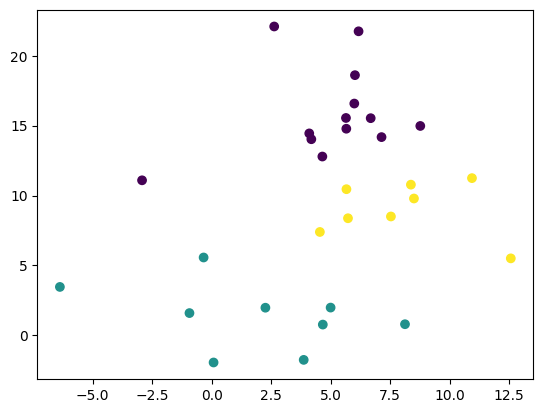

In [10]:
import matplotlib.pyplot as plt
plt.scatter(samples[:, 0], samples[:, 1], c=label)
plt.show()
